# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load scores

In [10]:
with open('Baseline\D3QN_baseline_large_scores.data', 'rb') as file:
    # read the data as binary data stream
    baseline_scores2 = pickle.load(file)

with open('Agents\D3QN_baseline_input_concat\D3QN_baseline_input_concat_large_scores.data', 'rb') as file:
    # store the data as binary data stream
    baseline_input_scores2 = pickle.load(file)


with open('Agents\D3QN_baseline_nn_concat\D3QN_baseline_nn_concat_large_scores.data', 'rb') as file:
    # store the data as binary data stream
    baseline_nn_scores2 = pickle.load(file)

In [11]:
baseline_scores2 = [scores[0] for scores in baseline_scores2]
baseline_input_scores2 = [scores[0] for scores in baseline_input_scores2]
baseline_nn_scores2 = [scores[0] for scores in baseline_nn_scores2]

## Helper functions

In [14]:
def calculate_moving_avg(scores_list):
    moving_avg_list = []
    for i, score in enumerate(scores_list, 1):
        current_avg = sum(scores_list[:i]) / len(scores_list[:i])
        moving_avg_list.append(current_avg)
        
    return moving_avg_list

In [15]:
def calculate_std_mean(scores_lists):
    moving_avgs = []
    for i in range(5):
        scores_list = [scores[i] for scores in scores_lists]
        mvg_avg = calculate_moving_avg(scores_list)
        moving_avgs.append(mvg_avg)
    mean = np.mean(moving_avgs, axis=0)
    std_dev = np.std(moving_avgs, axis=0)
    
    return mean, std_dev

## Calculate mean and standard devitation of the scores

In [16]:
baseline_mean2, baseline_std2 = calculate_std_mean(baseline_scores2)
baseline_input_mean2 , baseline_input_std2 = calculate_std_mean(baseline_input_scores2)
baseline_nn_mean2 , baseline_nn_std2 = calculate_std_mean(baseline_nn_scores2)

# Score Plots

<ipython-input-17-722fdd420be4>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(range(len(baseline_mean2)), baseline_mean2, 'k', label="D3QN-baseline", color= '#CC4F1B')
<ipython-input-17-722fdd420be4>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(range(len(baseline_input_mean2)), baseline_input_mean2,'k', label="D3QN-input-concat", color='#1B2ACC')
<ipython-input-17-722fdd420be4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(range(len(baseline_nn_mean2)), baseline_nn_mean2,'k', label = "D3QN-nn-concat", color='purple')


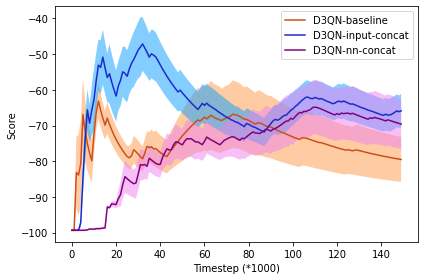

In [17]:
plt.figure()

plt.plot(range(len(baseline_mean2)), baseline_mean2, 'k', label="D3QN-baseline", color= '#CC4F1B')
plt.fill_between(range(len(baseline_mean2)), baseline_mean2-baseline_std2, baseline_mean2+baseline_std2, alpha=0.5, facecolor='#FF9848')

plt.plot(range(len(baseline_input_mean2)), baseline_input_mean2,'k', label="D3QN-input-concat", color='#1B2ACC')
plt.fill_between(range(len(baseline_input_mean2)), baseline_input_mean2-baseline_input_std2, baseline_input_mean2+baseline_input_std2,  alpha=0.5, facecolor='#089FFF')


plt.plot(range(len(baseline_nn_mean2)), baseline_nn_mean2,'k', label = "D3QN-nn-concat", color='purple')
plt.fill_between(range(len(baseline_nn_mean2)), baseline_nn_mean2-baseline_nn_std2, baseline_nn_mean2+baseline_nn_std2,  alpha=0.5, facecolor='violet')

plt.legend()
plt.xlabel('Timestep (*1000)')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig("Score plots")
plt.show()